In [198]:
import pandas as pd
import numpy as np

In [199]:
df=pd.read_csv("../Dataset/engineers_salary_prediction_train.csv")
test=pd.read_csv("../Dataset/engineers_salary_prediction_test.csv")

In [200]:
df.head()

,obs,job_title,job_posted_date,salary_category,job_state,feature_1,feature_2,feature_3,feature_4,feature_5,...,job_desc_291,job_desc_292,job_desc_293,job_desc_294,job_desc_295,job_desc_296,job_desc_297,job_desc_298,job_desc_299,job_desc_300
0,1,Others,2024/07,High,NY,A,0.6429,False,False,True,...,-0.362079,-0.499308,-0.367894,-0.214881,0.014870,-0.271177,-0.113347,-0.587955,-0.919095,-0.207340
1,2,Job_Title_1,2024/07,Low,CA,A,0.4678,False,False,False,...,-0.300989,-0.415411,-0.341824,-0.319064,0.042322,-0.124755,0.023489,-0.893224,-0.823024,0.112364
2,3,Others,2024/07,Low,CA,A,0.4610,False,False,False,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,4,Others,2024/07,Low,CA,A,0.5064,False,False,False,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,5,Others,2024/07,Low,CA,A,0.4640,False,False,False,...,-0.406159,-0.654657,-0.074398,-0.464479,0.081037,-0.136992,-0.276270,-0.696853,-0.601466,0.089939


<Axes: xlabel='job_state,feature_1'>

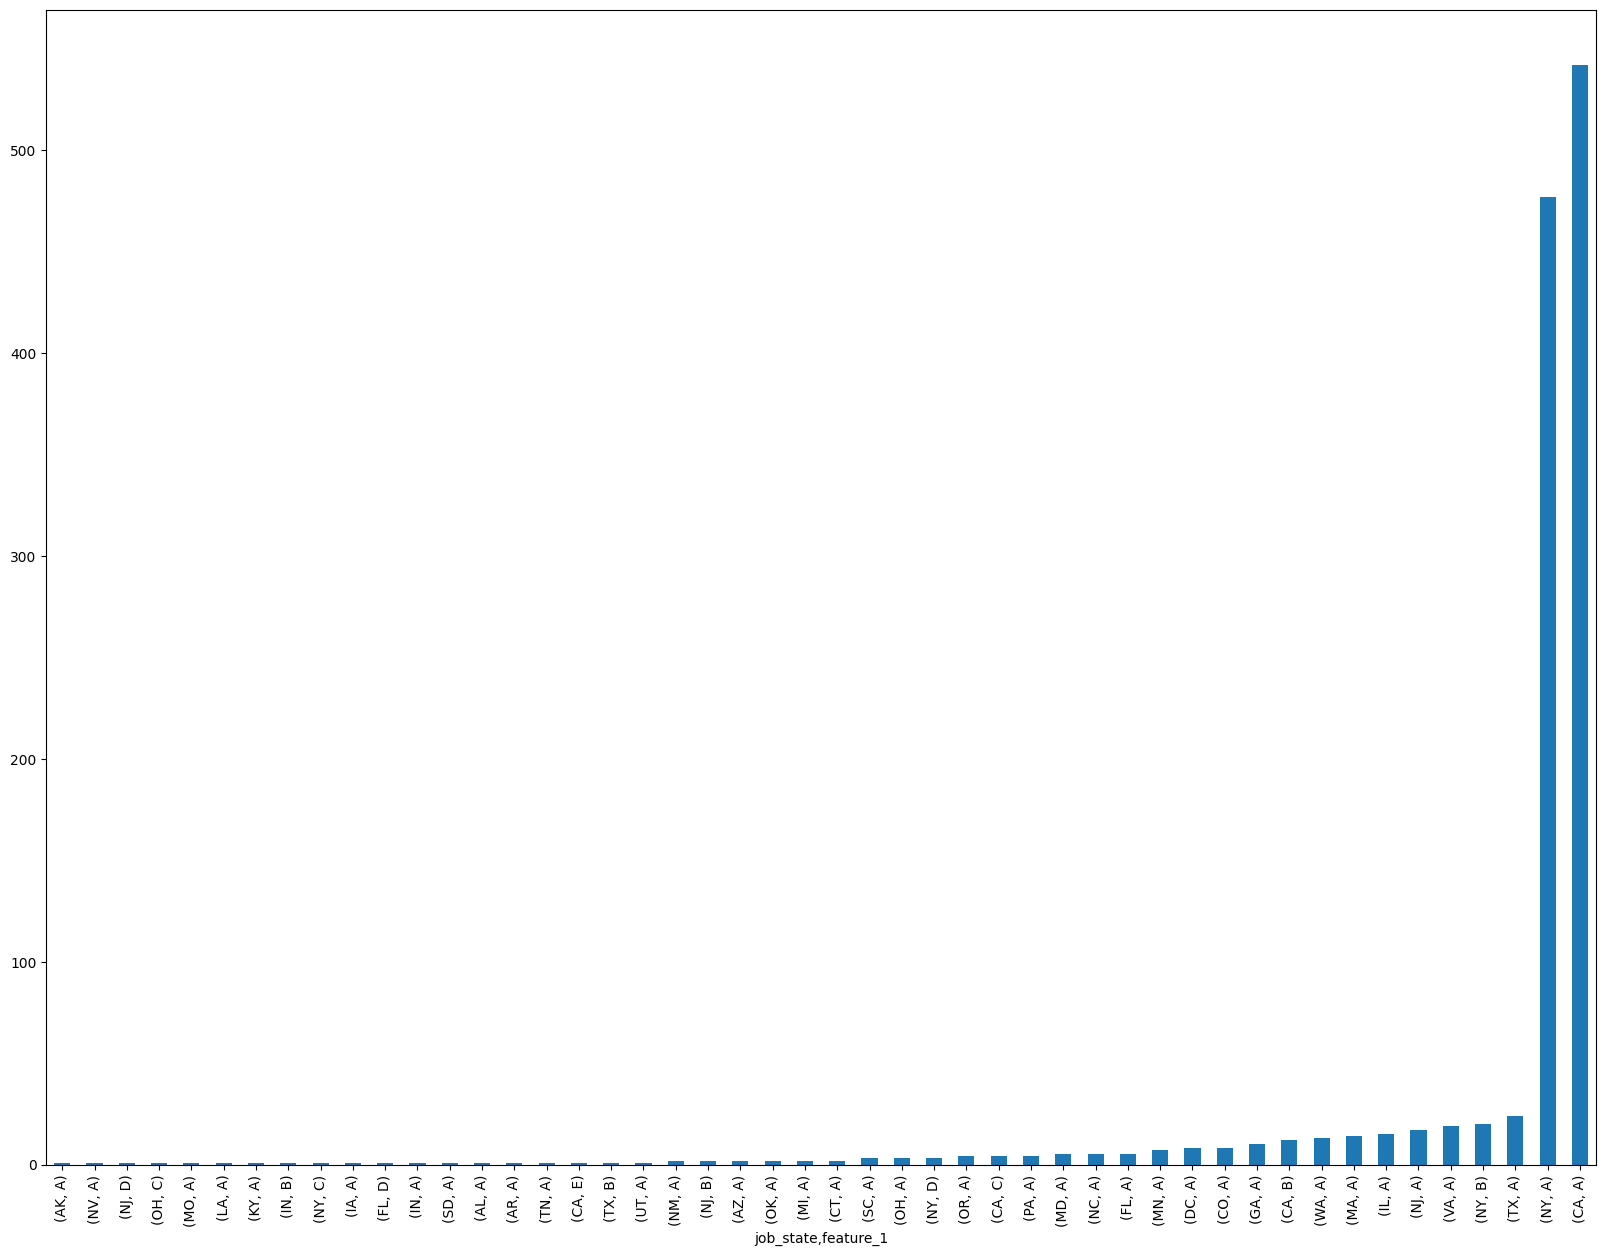

In [201]:
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt

plt.figure(figsize=(20,15))
df.groupby(by="job_state")["feature_1"].value_counts().sort_values().plot(kind="bar")

In [202]:
df["new"]=df["job_title"]+"_"+df["feature_1"]
plt.figure(figsize=(17,18))
df["new"].value_counts()

new
Others_A          858
Job_Title_10_A     50
Job_Title_5_A      46
Job_Title_3_A      45
Job_Title_7_A      37
Job_Title_8_A      35
Job_Title_2_A      32
Job_Title_1_A      27
Others_B           22
Job_Title_13_A     11
Job_Title_23_A      9
Job_Title_11_A      9
Job_Title_19_A      7
Job_Title_12_A      7
Job_Title_16_A      6
Others_C            6
Job_Title_6_A       5
Job_Title_5_B       5
Job_Title_4_A       5
Job_Title_20_A      5
Job_Title_26_A      4
Job_Title_25_A      4
Job_Title_21_A      4
Job_Title_17_A      4
Job_Title_18_A      4
Job_Title_8_B       4
Job_Title_9_A       4
Job_Title_15_A      4
Job_Title_24_A      3
Job_Title_14_A      3
Job_Title_22_A      3
Job_Title_10_B      2
Others_D            2
Others_E            1
Job_Title_7_B       1
Job_Title_8_D       1
Job_Title_3_D       1
Job_Title_27_A      1
Job_Title_10_D      1
Job_Title_23_B      1
Job_Title_20_B      1
Name: count, dtype: int64

<Figure size 1700x1800 with 0 Axes>

In [203]:
df.select_dtypes("object").columns.tolist()

['job_title',
 'job_posted_date',
 'salary_category',
 'job_state',
 'feature_1',
 'new']

In [204]:
test.head()

,obs,job_title,job_posted_date,job_state,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,...,job_desc_291,job_desc_292,job_desc_293,job_desc_294,job_desc_295,job_desc_296,job_desc_297,job_desc_298,job_desc_299,job_desc_300
0,1281,Others,2024/06,CA,A,0.6473,False,False,True,True,...,-0.054078,-0.573635,-0.306883,-0.325092,0.089463,-0.353476,-0.159314,-0.667958,-0.702116,-0.206267
1,1282,Others,2024/08,NY,A,0.4238,True,False,False,False,...,-0.868718,-0.337967,-0.179036,-0.717763,0.404843,0.032468,-0.190448,-1.261702,-0.505897,0.082080
2,1283,Others,2023/01,CA,A,0.6219,True,False,False,True,...,-0.416109,-0.619822,-0.493653,-0.347556,0.071679,-0.331212,-0.381348,-0.506540,-0.773561,-0.105221
3,1284,Job_Title_5,2024/06,NY,A,0.6704,False,False,False,True,...,-0.297560,-0.481448,-0.497642,-0.254823,0.047404,-0.362739,-0.102704,-0.491272,-0.808156,-0.048326
4,1285,Others,2024/05,CA,A,0.7310,False,False,False,True,...,-0.176458,-0.726473,-0.323976,-0.145825,-0.046866,-0.229873,-0.568318,-0.614605,-0.770506,0.142140


In [205]:
cat_columns=df.select_dtypes(include=["object","category"]).columns.tolist()
len(cat_columns)

6

In [206]:
num_columns=df.select_dtypes(include=["int","float64"]).columns.tolist()
len(num_columns)

303

In [207]:
num_columns=df.select_dtypes(include=["bool"]).columns.tolist()
len(num_columns)

9

In [208]:
df.dtypes.unique()

array([dtype('int64'), dtype('O'), dtype('float64'), dtype('bool')],
      dtype=object)

In [209]:
df["job_posted_date"].unique()

array(['2024/07', '2024/01', '2024/05', '2024/06', '2023/02', '2024/08',
       '2024/04', '2023/09', '2022/05', '2024/02', '2023/07', '2023/03',
       '2023/10', '2021/04', '2022/03', '2024/03', '2023/01', '2022/04',
       '2023/11', '2023/06', '2022/02', '2022/12', '2022/10', '2023/12',
       '2023/05', nan, '2021/06', '2023/04', '2021/08', '2021/02',
       '2022/06', '2023/08', '2022/01', '2020/09', '2021/12', '2021/07',
       '2021/03', '2022/11', '2020/12', '2018/11', '2021/01', '2021/11'],
      dtype=object)

In [210]:
df["job_title"].value_counts()

job_title
Others          889
Job_Title_10     53
Job_Title_5      51
Job_Title_3      46
Job_Title_8      40
Job_Title_7      38
Job_Title_2      32
Job_Title_1      27
Job_Title_13     11
Job_Title_23     10
Job_Title_11      9
Job_Title_19      7
Job_Title_12      7
Job_Title_16      6
Job_Title_20      6
Job_Title_6       5
Job_Title_4       5
Job_Title_9       4
Job_Title_25      4
Job_Title_15      4
Job_Title_17      4
Job_Title_18      4
Job_Title_21      4
Job_Title_26      4
Job_Title_14      3
Job_Title_24      3
Job_Title_22      3
Job_Title_27      1
Name: count, dtype: int64

In [211]:
df["salary_category"].value_counts()

salary_category
High      501
Low       419
Medium    360
Name: count, dtype: int64

In [212]:
def job_catagory(val):
    if(val=="High"):
        return 2
    elif(val=="Medium"):
        return 1
    else:
        return 0

In [213]:
df["salary_category"]=df["salary_category"].apply(job_catagory)

In [214]:
df.head(10)

,obs,job_title,job_posted_date,salary_category,job_state,feature_1,feature_2,feature_3,feature_4,feature_5,...,job_desc_292,job_desc_293,job_desc_294,job_desc_295,job_desc_296,job_desc_297,job_desc_298,job_desc_299,job_desc_300,new
0,1,Others,2024/07,2,NY,A,0.6429,False,False,True,...,-0.499308,-0.367894,-0.214881,0.014870,-0.271177,-0.113347,-0.587955,-0.919095,-0.207340,Others_A
1,2,Job_Title_1,2024/07,0,CA,A,0.4678,False,False,False,...,-0.415411,-0.341824,-0.319064,0.042322,-0.124755,0.023489,-0.893224,-0.823024,0.112364,Job_Title_1_A
2,3,Others,2024/07,0,CA,A,0.4610,False,False,False,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,Others_A
3,4,Others,2024/07,0,CA,A,0.5064,False,False,False,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,Others_A
4,5,Others,2024/07,0,CA,A,0.4640,False,False,False,...,-0.654657,-0.074398,-0.464479,0.081037,-0.136992,-0.276270,-0.696853,-0.601466,0.089939,Others_A
5,6,Others,2024/01,2,WA,A,0.6681,False,False,False,...,-0.998258,-1.017181,0.372677,0.025714,-0.440318,-0.442595,-0.761192,-0.606944,-0.123160,Others_A
6,7,Others,2024/07,0,CA,A,0.4510,False,False,False,...,-0.684944,-0.484077,-0.289621,0.009149,-0.445414,-0.321164,-0.700979,-0.849695,0.004260,Others_A
7,8,Others,2024/07,0,NC,A,0.4661,False,False,False,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,Others_A
8,9,Others,2024/07,2,CA,A,0.7349,False,False,False,...,-0.426043,-0.175965,-0.147661,0.197479,-0.207085,0.190253,-0.569806,-0.584224,0.143645,Others_A
9,10,Others,2024/05,2,NY,A,0.7240,False,False,False,...,-0.323800,-0.138691,-0.478873,-0.115098,0.004634,-0.157343,-0.859955,-0.689171,0.005245,Others_A


In [215]:
df=df.drop(columns=["obs"])

In [216]:

X_train=df.drop(columns=["salary_category"])
Y_train=df["salary_category"]

for col in X_train.columns:
    if X_train[col].dtype == 'bool':
        X_train[col] = X_train[col].astype(int)
        test[col] = test[col].astype(int)

In [217]:
test=test.drop(columns=["obs"])

In [218]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler,OneHotEncoder,LabelEncoder,OrdinalEncoder


numaric_columns=X_train.select_dtypes(include=["int","float64"]).columns.tolist()
catagory_columns=X_train.select_dtypes(include=["object"]).columns.tolist()

print(f"Found {len(numaric_columns)} numaric columns and {len(catagory_columns)} catagorical columns")
num_pipeline=Pipeline(
    [
        ("impute",SimpleImputer(strategy="mean")),
        ("standard",StandardScaler()),
    ]
)
cat_pipeline=Pipeline(
    [
        ("impute",SimpleImputer(strategy="most_frequent")),
        ("odrinal",OneHotEncoder(handle_unknown="ignore")),
    ]
)

column_transform=ColumnTransformer(
    [
        ("numaric",num_pipeline,numaric_columns),
        ("cat",cat_pipeline,catagory_columns),
    ]
)

Found 311 numaric columns and 5 catagorical columns


## LightGBM Model Train Result

In [219]:
# import lightgbm as lgb


# lgb_model = lgb.LGBMClassifier(
#     objective='multiclass',
#     num_class=len(np.unique(Y_train)),
#     boosting_type='gbdt',
#     learning_rate=0.05,
#     n_estimators=2000,
#     max_depth=12,
#     num_leaves=30,
#     subsample=0.8,
#     colsample_bytree=0.8,
#     min_child_samples=20,
#     random_state=42
# )

# model=Pipeline(
#     [
#         ("transform",column_transform),
#         ("lgb",lgb_model)
#     ]
# )
# model.fit(X_train,Y_train)

In [220]:
Y_train.unique()

array([2, 0, 1], dtype=int64)

In [221]:
Test_X=test.copy()

In [222]:
Test_X.head()

,job_title,job_posted_date,job_state,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,...,job_desc_291,job_desc_292,job_desc_293,job_desc_294,job_desc_295,job_desc_296,job_desc_297,job_desc_298,job_desc_299,job_desc_300
0,Others,2024/06,CA,A,0.6473,0,0,1,1,0,...,-0.054078,-0.573635,-0.306883,-0.325092,0.089463,-0.353476,-0.159314,-0.667958,-0.702116,-0.206267
1,Others,2024/08,NY,A,0.4238,1,0,0,0,0,...,-0.868718,-0.337967,-0.179036,-0.717763,0.404843,0.032468,-0.190448,-1.261702,-0.505897,0.082080
2,Others,2023/01,CA,A,0.6219,1,0,0,1,1,...,-0.416109,-0.619822,-0.493653,-0.347556,0.071679,-0.331212,-0.381348,-0.506540,-0.773561,-0.105221
3,Job_Title_5,2024/06,NY,A,0.6704,0,0,0,1,0,...,-0.297560,-0.481448,-0.497642,-0.254823,0.047404,-0.362739,-0.102704,-0.491272,-0.808156,-0.048326
4,Others,2024/05,CA,A,0.7310,0,0,0,1,1,...,-0.176458,-0.726473,-0.323976,-0.145825,-0.046866,-0.229873,-0.568318,-0.614605,-0.770506,0.142140


In [ ]:
predicted_y=model.predict(Test_X)
predicted_y

c:\Users\Lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


array([1, 2, 1, 3, 1, 2, 1, 3, 2, 2, 2, 1, 3, 3, 3, 1, 1, 1, 1, 1, 1, 2,
       1, 3, 2, 1, 3, 3, 1, 1, 3, 3, 2, 1, 2, 3, 2, 3, 2, 2, 3, 1, 3, 1,
       3, 2, 1, 3, 3, 3, 2, 1, 3, 2, 3, 1, 1, 2, 2, 2, 1, 2, 2, 2, 2, 1,
       1, 1, 1, 2, 1, 3, 3, 2, 2, 3, 3, 1, 1, 2, 1, 2, 1, 2, 2, 2, 3, 3,
       1, 1, 3, 2, 1, 2, 1, 1, 2, 1, 1, 2, 2, 1, 2, 1, 3, 3, 2, 1, 1, 3,
       1, 3, 1, 1, 3, 1, 2, 3, 2, 3, 3, 3, 2, 3, 3, 3, 1, 3, 3, 2, 2, 1,
       2, 2, 3, 1, 3, 1, 1, 1, 1, 3, 2, 2, 1, 1, 3, 1, 1, 2, 2, 1, 2, 3,
       1, 3, 3, 3, 3, 1, 2, 1, 2, 1, 1, 2, 2, 3, 3, 3, 2, 2, 2, 3, 3, 2,
       2, 3, 3, 1, 3, 2, 1, 2, 3, 3, 2, 3, 2, 3, 2, 1, 1, 2, 1, 1, 2, 2,
       2, 1, 1, 1, 1, 2, 3, 2, 3, 1, 3, 1, 2, 2, 1, 3, 1, 2, 1, 3, 2, 2,
       2, 3, 3, 2, 1, 3, 3, 1, 2, 2, 1, 1, 1, 2, 3, 2, 1, 1, 1, 3, 1, 1,
       3, 1, 1, 2, 2, 1, 3, 1, 2, 1, 2, 1, 3, 3, 1, 3, 1, 1, 2, 1, 3, 1,
       1, 1, 3, 1, 3, 3, 1, 1, 2, 2, 2, 2, 1, 3, 1, 3, 1, 1, 3, 1, 1, 3,
       3, 1, 1, 2, 2, 1, 1, 1, 3, 1, 3, 3, 2, 1, 3,

In [ ]:
import pandas as pd
import numpy as np

# Read the test data
test = pd.read_csv("../Dataset/engineers_salary_prediction_test.csv")



# Mapping numeric classes to category labels
label_map = {1: "Low", 2: "Medium", 3: "High"}
mapped_preds = [label_map[val] for val in predicted_y]
print(mapped_preds)
# Create submission DataFrame
submission = pd.DataFrame({
    "obs": test["obs"],  # assuming obs starts at 1281
    "salary_category": mapped_preds
})

submission.to_csv("engineerr_salary_submission.csv", index=False)


['Low', 'Medium', 'Low', 'High', 'Low', 'Medium', 'Low', 'High', 'Medium', 'Medium', 'Medium', 'Low', 'High', 'High', 'High', 'Low', 'Low', 'Low', 'Low', 'Low', 'Low', 'Medium', 'Low', 'High', 'Medium', 'Low', 'High', 'High', 'Low', 'Low', 'High', 'High', 'Medium', 'Low', 'Medium', 'High', 'Medium', 'High', 'Medium', 'Medium', 'High', 'Low', 'High', 'Low', 'High', 'Medium', 'Low', 'High', 'High', 'High', 'Medium', 'Low', 'High', 'Medium', 'High', 'Low', 'Low', 'Medium', 'Medium', 'Medium', 'Low', 'Medium', 'Medium', 'Medium', 'Medium', 'Low', 'Low', 'Low', 'Low', 'Medium', 'Low', 'High', 'High', 'Medium', 'Medium', 'High', 'High', 'Low', 'Low', 'Medium', 'Low', 'Medium', 'Low', 'Medium', 'Medium', 'Medium', 'High', 'High', 'Low', 'Low', 'High', 'Medium', 'Low', 'Medium', 'Low', 'Low', 'Medium', 'Low', 'Low', 'Medium', 'Medium', 'Low', 'Medium', 'Low', 'High', 'High', 'Medium', 'Low', 'Low', 'High', 'Low', 'High', 'Low', 'Low', 'High', 'Low', 'Medium', 'High', 'Medium', 'High', 'High', 

<Axes: >

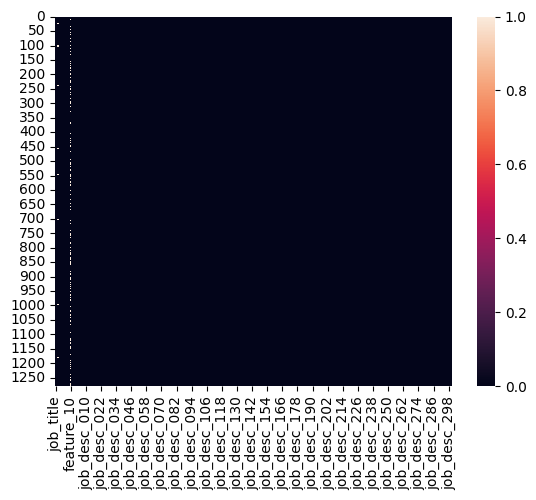

In [ ]:
import seaborn as sns 
sns.heatmap(X_train.isnull())

In [ ]:
X_train.dtypes.unique()

array([dtype('O'), dtype('float64'), dtype('int32')], dtype=object)

In [ ]:
pipeline=Pipeline(
    [
        ("transformer",column_transform)
    ]
)

In [ ]:
pipeline.fit(X_train)

X_trained_processed = pipeline.transform(X_train)
X_trained_processed

array([[ 0.46477322, -0.3602    , -0.2236985 , ...,  0.        ,
         0.        ,  0.        ],
       [-1.14717881, -0.3602    , -0.2236985 , ...,  0.        ,
         0.        ,  0.        ],
       [-1.20977889, -0.3602    , -0.2236985 , ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [-0.12256281, -0.3602    , -0.2236985 , ...,  0.        ,
         0.        ,  0.        ],
       [ 1.0659181 , -0.3602    , -0.2236985 , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.0670786 , -0.3602    , -0.2236985 , ...,  0.        ,
         0.        ,  0.        ]])

In [ ]:
X_trained_processed.shape

(1280, 421)

In [ ]:
np.unique(Y_train)

array([1, 2, 3], dtype=int64)

In [ ]:
Y_train.shape

(1280,)

### he he he some help from chatgpt

In [ ]:

from tensorflow.keras.utils import to_categorical

# Subtract 1 from Y_train to make the labels zero-indexed
Y_train_zero_indexed = Y_train - 1

# Now apply to_categorical with the correct number of classes
Y_train_one_hot = to_categorical(Y_train_zero_indexed, num_classes=3)

# Work with Tensorflow

In [ ]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Dropout,BatchNormalization

model=Sequential(
    [
        Dense(180,activation="relu",input_shape=[X_trained_processed.shape[1]]),
        BatchNormalization(),
        Dropout(.2),

        Dense(100,activation="relu"),
        BatchNormalization(),
        Dropout(.2),
        
        Dense(20,activation="relu"),
        BatchNormalization(),
        Dropout(.2),

        Dense(3,activation="softmax")
    ]
)
model.summary()

Model: "sequential_25"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_90 (Dense)                │ (None, 180)            │        75,960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_47          │ (None, 180)            │           720 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_65 (Dropout)            │ (None, 180)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_91 (Dense)                │ (None, 100)            │        18,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_48          │ (None, 100)            │           400 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_66 (Dropout)            │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_92 (Dense)                │ (None, 20)             │         2,020 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_49          │ (None, 20)             │            80 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_67 (Dropout)            │ (None, 20)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_93 (Dense)                │ (None, 3)              │            63 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 97,343 (380.25 KB)

 Trainable params: 96,743 (377.90 KB)

 Non-trainable params: 600 (2.34 KB)

In [ ]:
lr_scheduler = tf.keras.callbacks.ReduceLROnPlateau(
    monitor='accuracy', factor=0.3, patience=10, min_lr=1e-6
)
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='accuracy', patience=25, restore_best_weights=True
)

checkpoint = tf.keras.callbacks.ModelCheckpoint(
    filepath='ai/ann_best_model.keras',      
    monitor='accuracy',                 
    mode='max',                        
    save_best_only=True,                 
    verbose=1
)


In [ ]:
model.compile(optimizer=tf.keras.optimizers.Adam(.01),loss=tf.keras.losses.CategoricalCrossentropy(from_logits=False),metrics=['accuracy', 'AUC', 'Precision'])

In [ ]:
history=model.fit(X_trained_processed,Y_train_one_hot,epochs=200,validation_split=0.2,batch_size=16,callbacks=[early_stopping,lr_scheduler,checkpoint])

Epoch 1/200


63/64 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.9970 - Precision: 0.9694 - accuracy: 0.9684 - loss: 0.1027
Epoch 1: accuracy improved from -inf to 0.95996, saving model to ai/ann_best_model.keras
64/64 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - AUC: 0.9969 - Precision: 0.9692 - accuracy: 0.9681 - loss: 0.1037 - val_AUC: 0.8435 - val_Precision: 0.6988 - val_accuracy: 0.6914 - val_loss: 1.3987 - learning_rate: 0.0100
Epoch 2/200
53/64 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.9940 - Precision: 0.9476 - accuracy: 0.9447 - loss: 0.1462
Epoch 2: accuracy did not improve from 0.95996
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - AUC: 0.9938 - Precision: 0.9478 - accuracy: 0.9443 - loss: 0.1483 - val_AUC: 0.8564 - val_Precision: 0.7362 - val_accuracy: 0.7344 - val_loss: 1.1937 - learning_rate: 0.0100
Epoch 3/200
48/64 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.9948 - Precision: 0.9534 - accuracy: 0.9490 - loss: 0.1312
Epoch 3: accuracy did not improve from 0.95996
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - 

In [ ]:
Test_X_encoded=pipeline.transform(Test_X)

In [ ]:
Test_X_encoded.shape

(854, 421)

In [ ]:
model = tf.keras.models.load_model(".//ai/ann_best_model.keras")

In [ ]:
pred_y=model.predict(Test_X_encoded)

27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step


In [ ]:
pred_y

array([[9.9929667e-01, 7.0321001e-04, 1.6503252e-07],
       [2.8722810e-02, 9.6408790e-01, 7.1892454e-03],
       [9.9999905e-01, 9.2857380e-07, 6.4296866e-09],
       ...,
       [9.4172263e-01, 3.0688921e-02, 2.7588399e-02],
       [8.6403525e-01, 8.4469788e-02, 5.1494971e-02],
       [9.9113524e-01, 8.8646896e-03, 2.3500960e-13]], dtype=float32)

In [ ]:
# Define the mapping based on index
index_to_label = {0: 'High', 1: 'Medium', 2: 'Low'}

# Get the index of the max probability for each row
predicted_indices = np.argmax(pred_y, axis=1)

# Map the indices to labels
predicted_labels = [index_to_label[idx] for idx in predicted_indices]
predicted_labels

['High',
 'Medium',
 'High',
 'Low',
 'High',
 'Low',
 'High',
 'Low',
 'Medium',
 'High',
 'Medium',
 'High',
 'Low',
 'Low',
 'Low',
 'High',
 'High',
 'High',
 'High',
 'High',
 'High',
 'Medium',
 'Low',
 'Low',
 'Medium',
 'High',
 'High',
 'Low',
 'High',
 'High',
 'Low',
 'Low',
 'Low',
 'High',
 'Low',
 'Low',
 'Medium',
 'Low',
 'Medium',
 'Medium',
 'High',
 'High',
 'Medium',
 'High',
 'Low',
 'High',
 'High',
 'High',
 'Medium',
 'Low',
 'Medium',
 'High',
 'Low',
 'Medium',
 'Medium',
 'High',
 'High',
 'High',
 'Medium',
 'Medium',
 'High',
 'Low',
 'High',
 'Low',
 'Medium',
 'High',
 'High',
 'High',
 'High',
 'Medium',
 'Medium',
 'Low',
 'Low',
 'Medium',
 'Low',
 'Low',
 'Low',
 'High',
 'High',
 'Medium',
 'Medium',
 'Low',
 'High',
 'High',
 'Medium',
 'Medium',
 'Low',
 'Low',
 'High',
 'High',
 'Low',
 'Medium',
 'High',
 'Medium',
 'High',
 'High',
 'Medium',
 'High',
 'High',
 'Medium',
 'High',
 'High',
 'Medium',
 'High',
 'Low',
 'Medium',
 'Medium',
 'High'

In [ ]:
import pandas as pd
import numpy as np

# Read the test data
test = pd.read_csv("../Dataset/engineers_salary_prediction_test.csv")


print(mapped_preds)
# Create submission DataFrame
submission = pd.DataFrame({
    "obs": test["obs"],  # assuming obs starts at 1281
    "salary_category": predicted_labels
})

submission.to_csv("new_engineerr_salary_submission.csv", index=False)


['Low', 'Medium', 'Low', 'High', 'Low', 'Medium', 'Low', 'High', 'Medium', 'Medium', 'Medium', 'Low', 'High', 'High', 'High', 'Low', 'Low', 'Low', 'Low', 'Low', 'Low', 'Medium', 'Low', 'High', 'Medium', 'Low', 'High', 'High', 'Low', 'Low', 'High', 'High', 'Medium', 'Low', 'Medium', 'High', 'Medium', 'High', 'Medium', 'Medium', 'High', 'Low', 'High', 'Low', 'High', 'Medium', 'Low', 'High', 'High', 'High', 'Medium', 'Low', 'High', 'Medium', 'High', 'Low', 'Low', 'Medium', 'Medium', 'Medium', 'Low', 'Medium', 'Medium', 'Medium', 'Medium', 'Low', 'Low', 'Low', 'Low', 'Medium', 'Low', 'High', 'High', 'Medium', 'Medium', 'High', 'High', 'Low', 'Low', 'Medium', 'Low', 'Medium', 'Low', 'Medium', 'Medium', 'Medium', 'High', 'High', 'Low', 'Low', 'High', 'Medium', 'Low', 'Medium', 'Low', 'Low', 'Medium', 'Low', 'Low', 'Medium', 'Medium', 'Low', 'Medium', 'Low', 'High', 'High', 'Medium', 'Low', 'Low', 'High', 'Low', 'High', 'Low', 'Low', 'High', 'Low', 'Medium', 'High', 'Medium', 'High', 'High', 

# Let's try PCA with ANN

In [223]:
features=df.columns.tolist()
job_features=[f for f in features if f.startswith("job_desc")]

In [224]:
X_train[job_features]

,job_desc_001,job_desc_002,job_desc_003,job_desc_004,job_desc_005,job_desc_006,job_desc_007,job_desc_008,job_desc_009,job_desc_010,...,job_desc_291,job_desc_292,job_desc_293,job_desc_294,job_desc_295,job_desc_296,job_desc_297,job_desc_298,job_desc_299,job_desc_300
0,0.193511,2.275482,-0.440363,-0.327473,0.058464,-0.154043,-0.393158,-0.367905,-0.703665,0.562969,...,-0.362079,-0.499308,-0.367894,-0.214881,0.014870,-0.271177,-0.113347,-0.587955,-0.919095,-0.207340
1,0.100152,2.291134,-0.356041,-0.494735,0.038632,-0.356995,-0.633020,-0.444805,-0.252597,0.187210,...,-0.300989,-0.415411,-0.341824,-0.319064,0.042322,-0.124755,0.023489,-0.893224,-0.823024,0.112364
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.406864,1.986625,-0.726046,-0.316294,0.062115,-0.451118,-0.659871,-0.451544,-0.505597,0.119204,...,-0.406159,-0.654657,-0.074398,-0.464479,0.081037,-0.136992,-0.276270,-0.696853,-0.601466,0.089939
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1275,0.247692,2.241664,-0.773778,-0.349046,-0.112922,-0.443660,-0.623765,-0.574480,-0.646541,0.056761,...,-0.089303,-0.471856,0.002497,0.245694,0.251105,0.119141,-0.184764,-0.482634,-0.819574,-0.241306
1276,-0.000119,2.386898,-0.568260,-0.072558,-0.176302,0.119118,-0.414387,-0.924835,-0.025357,0.178054,...,-0.079315,-0.796785,0.154025,-0.462344,-0.053803,-0.297083,-0.277624,-0.924568,-0.897608,-0.236864
1277,0.020596,1.710889,-0.127225,0.094155,-0.230931,-0.094211,-0.464730,-0.415120,-0.250254,0.244051,...,-0.030367,-0.329539,-0.429462,-0.141221,0.119336,-0.483549,-0.146601,-0.715821,-0.739832,-0.128655
1278,0.385978,2.305014,-0.250134,0.010997,0.008592,-0.393612,-0.502189,-0.598519,-0.664700,-0.041492,...,-0.213866,-0.242665,-0.311564,-0.032751,-0.301447,-0.480434,-0.112401,-0.828844,-1.066424,-0.228583


In [225]:
from sklearn.decomposition import PCA

pca=PCA(15)
new_job_features=pca.fit_transform(X_train[job_features])

pca_df=pd.DataFrame(new_job_features,columns=["PCA_1","PCA_2","PCA_3","PCA_4","PCA_5","PCA_6","PCA_7","PCA_8","PCA_9","PCA_10","PCA_11","PCA_12","PCA_13","PCA_14","PCA_15"])
pca_df.head()

,PCA_1,PCA_2,PCA_3,PCA_4,PCA_5,PCA_6,PCA_7,PCA_8,PCA_9,PCA_10,PCA_11,PCA_12,PCA_13,PCA_14,PCA_15
0,1.380112,0.469987,-0.075655,-1.038070,0.417364,-0.591893,-0.349075,0.128731,0.344220,0.286221,-0.299898,0.089952,-0.377720,-0.368970,-0.465331
1,1.210201,0.024486,-0.126489,-1.323580,0.505531,-0.470055,-0.958401,-0.599469,0.581653,-0.648634,0.075395,-0.215588,0.553147,-0.104168,-0.105895
2,-7.344770,-0.170561,0.067727,0.056237,-0.017499,-0.233536,0.121877,-0.030255,0.088041,0.049815,-0.032149,0.032170,-0.002428,-0.031415,0.003118
3,-7.344770,-0.170561,0.067727,0.056237,-0.017499,-0.233536,0.121877,-0.030255,0.088041,0.049815,-0.032149,0.032170,-0.002428,-0.031415,0.003118
4,1.261816,-1.331539,-0.602937,-0.419041,0.312946,-0.456935,-0.397791,0.386783,0.059608,0.020664,0.414326,0.515361,0.564903,0.044567,0.057638


In [226]:
X_train_pca=X_train.drop(columns=job_features)
X_train_pca=pd.concat([X_train_pca,pca_df],axis=1)
X_train_pca["job_posted_date"]=pd.to_datetime(X_train_pca["job_posted_date"])
X_train_pca["year"]=X_train_pca["job_posted_date"].dt.year
X_train_pca["month"]=X_train_pca["job_posted_date"].dt.month
X_train_pca.drop(columns=["job_posted_date"],inplace=True)
X_train_pca.head()

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_8936\1933739389.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  X_train_pca["job_posted_date"]=pd.to_datetime(X_train_pca["job_posted_date"])


,job_title,job_state,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,...,PCA_8,PCA_9,PCA_10,PCA_11,PCA_12,PCA_13,PCA_14,PCA_15,year,month
0,Others,NY,A,0.6429,0,0,1,1,1,0,...,0.128731,0.344220,0.286221,-0.299898,0.089952,-0.377720,-0.368970,-0.465331,2024.0,7.0
1,Job_Title_1,CA,A,0.4678,0,0,0,1,1,1,...,-0.599469,0.581653,-0.648634,0.075395,-0.215588,0.553147,-0.104168,-0.105895,2024.0,7.0
2,Others,CA,A,0.4610,0,0,0,1,1,1,...,-0.030255,0.088041,0.049815,-0.032149,0.032170,-0.002428,-0.031415,0.003118,2024.0,7.0
3,Others,CA,A,0.5064,0,0,0,1,1,1,...,-0.030255,0.088041,0.049815,-0.032149,0.032170,-0.002428,-0.031415,0.003118,2024.0,7.0
4,Others,CA,A,0.4640,0,0,0,1,1,0,...,0.386783,0.059608,0.020664,0.414326,0.515361,0.564903,0.044567,0.057638,2024.0,7.0


In [227]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler,OneHotEncoder,LabelEncoder,OrdinalEncoder



numaric_columns=X_train_pca.select_dtypes(include=["int","float64"]).columns.tolist()
catagory_columns=X_train_pca.select_dtypes(include=["object"]).columns.tolist()

print(f"Found {len(numaric_columns)} numaric columns and {len(catagory_columns)} catagorical columns")
num_pipeline=Pipeline(
    [
        ("impute",SimpleImputer(strategy="mean")),
        ("standard",StandardScaler()),
    ]
)
cat_pipeline=Pipeline(
    [
        ("impute",SimpleImputer(strategy="most_frequent")),
        ("odrinal",OneHotEncoder(handle_unknown="ignore")),
    ]
)

column_transform=ColumnTransformer(
    [
        ("numaric",num_pipeline,numaric_columns),
        ("cat",cat_pipeline,catagory_columns),
    ]
)

Found 28 numaric columns and 4 catagorical columns


In [228]:
pipeline=Pipeline(
    [
        ("transformer",column_transform)
    ]
)
pipeline.fit(X_train_pca)

X_trained_processed = pipeline.transform(X_train_pca)
X_trained_processed

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 40959 stored elements and shape (1280, 138)>

In [229]:
import os
os.environ["LOKY_MAX_CPU_COUNT"] = "4"  # Or however many CPU cores you have


In [ ]:
from imblearn.over_sampling import SMOTE

smote=SMOTE(random_state=42)
X_trained_processed,Y_train=smote.fit_resample(X_trained_processed,Y_train)

In [231]:

from tensorflow.keras.utils import to_categorical

Y_train_zero_indexed = Y_train

# Now apply to_categorical with the correct number of classes
Y_train_one_hot = to_categorical(Y_train_zero_indexed, num_classes=3)

In [232]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Dropout,BatchNormalization

model=Sequential(
    [
        Dense(136,activation="relu",input_shape=[X_trained_processed.shape[1]]),
        BatchNormalization(),
        Dropout(.2),

        Dense(100,activation="relu"),
        BatchNormalization(),
        Dropout(.2),

        Dense(10,activation="relu"),
        BatchNormalization(),
        Dropout(.2),

        Dense(3,activation="softmax")
    ]
)
model.summary()

c:\Users\Lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_8 (Dense)                 │ (None, 136)            │        18,904 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 136)            │           544 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 136)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 100)            │        13,700 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_7           │ (None, 100)            │           400 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 10)             │         1,010 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_8           │ (None, 10)             │            40 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 10)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 3)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 34,631 (135.28 KB)

 Trainable params: 34,139 (133.36 KB)

 Non-trainable params: 492 (1.92 KB)

In [296]:
lr_scheduler = tf.keras.callbacks.ReduceLROnPlateau(
    monitor='val_accuracy', factor=0.3, patience=10, min_lr=1e-6
)
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_accuracy', patience=35, restore_best_weights=True
)

checkpoint = tf.keras.callbacks.ModelCheckpoint(
    filepath='pca/ann_best_model.keras',      
    monitor='val_accuracy',                 
    mode='max',                        
    save_best_only=True,                 
    verbose=1
)


In [297]:
model.compile(optimizer=tf.keras.optimizers.Adam(.01),loss=tf.keras.losses.CategoricalCrossentropy(from_logits=False),metrics=['accuracy', 'AUC', 'Precision'])

In [305]:

# history=model.fit(X_trained_processed,Y_train_one_hot,epochs=200,validation_split=0.2,batch_size=20,callbacks=[early_stopping,lr_scheduler,checkpoint])

# Trying Advanced Modified model strucure from ChatGPT

In [166]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, Activation, LeakyReLU
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.optimizers.schedules import ExponentialDecay
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau,EarlyStopping
from tensorflow.keras.initializers import HeNormal, Constant


# Build the model
model = Sequential([
    # Input layer + first hidden block
    Dense(350,
          kernel_initializer=HeNormal(),
          bias_initializer=Constant(0.1),
          input_shape=(X_trained_processed.shape[1],)
    ),
    BatchNormalization(),
    Activation('relu'),
    # Or use LeakyReLU(alpha=0.01):
    # LeakyReLU(alpha=0.01),
    Dropout(0.25),

    # Second hidden block
    Dense(180, kernel_initializer=HeNormal(), bias_initializer=Constant(0.1)),
    BatchNormalization(),
    Activation('relu'),
    Dropout(0.25),

    # Third hidden block
    Dense(80, kernel_initializer=HeNormal(), bias_initializer=Constant(0.1)),
    BatchNormalization(),
    Activation('relu'),
    Dropout(0.3),

    # Output layer for 3-class classification
    Dense(3, activation='softmax')
])

# Compile the model with Adam + LR schedule
model.compile(
    optimizer=Adam(learning_rate=.01),
    loss='categorical_crossentropy',
    metrics=['accuracy', 'AUC', 'Precision']
)

# Callbacks
callbacks = [
    # Save only the best model based on validation loss
    ModelCheckpoint(
        filepath='gpt2/best_model.keras',
        monitor='val_accuracy',
        mode='max',
        save_best_only=True,
        verbose=2
    ),
    
    # Stop training early if no improvement (prevents overfitting)
    EarlyStopping(
        monitor='val_accuracy',
        mode='max',
        patience=35,
        restore_best_weights=True,
        verbose=1
    ),
    
    # Reduce learning rate if stuck
    ReduceLROnPlateau(
        monitor='val_accuracy',
        mode='max',
        factor=0.3,
        patience=20,
        min_lr=1e-6,
        verbose=1
    )
]

# Display the model summary
model.summary()

# Example fit call:
history = model.fit(
    X_trained_processed, Y_train_one_hot,
    epochs=250,
    batch_size=40,
    validation_split=.2,
    callbacks=callbacks
)


c:\Users\Lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                 │ (None, 350)            │       108,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 350)            │         1,400 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_3 (Activation)       │ (None, 350)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 350)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 180)            │        63,180 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 180)            │           720 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_4 (Activation)       │ (None, 180)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 180)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 80)             │        14,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 80)             │           320 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_5 (Activation)       │ (None, 80)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 80)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 3)              │           243 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 188,843 (737.67 KB)

 Trainable params: 187,623 (732.90 KB)

 Non-trainable params: 1,220 (4.77 KB)

Epoch 1/250
22/26 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - AUC: 0.6708 - Precision: 0.5178 - accuracy: 0.5073 - loss: 1.1835
Epoch 1: val_accuracy improved from -inf to 0.64453, saving model to gpt2/best_model.keras
26/26 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - AUC: 0.6820 - Precision: 0.5290 - accuracy: 0.5172 - loss: 1.1596 - val_AUC: 0.8199 - val_Precision: 0.6556 - val_accuracy: 0.6445 - val_loss: 0.9213 - learning_rate: 0.0100
Epoch 2/250
20/26 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - AUC: 0.8657 - Precision: 0.7360 - accuracy: 0.7014 - loss: 0.7000
Epoch 2: val_accuracy improved from 0.64453 to 0.68750, saving model to gpt2/best_model.keras
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - AUC: 0.8663 - Precision: 0.7390 - accuracy: 0.7056 - loss: 0.7011 - val_AUC: 0.8625 - val_Precision: 0.7113 - val_accuracy: 0.6875 - val_loss: 0.7875 - learning_rate: 0.0100
Epoch 3/250
21/26 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - AUC: 0.9039 - Precision: 0.8084 - accuracy: 0.7618 - loss: 0.5999
Epoch 3: val_accuracy impr

In [167]:
model=tf.keras.models.load_model("gpt2/best_model.keras")

In [168]:
test_pca=pca.transform(Test_X[job_features])

test_pca_df=pd.DataFrame(test_pca,columns=["PCA_1","PCA_2","PCA_3","PCA_4","PCA_5","PCA_6","PCA_7","PCA_8","PCA_9","PCA_10","PCA_11","PCA_12","PCA_13","PCA_14","PCA_15"])

new_Test_X=Test_X.drop(columns=job_features)

Test_X_pca=pd.concat([new_Test_X,test_pca_df],axis=1)
Test_X_pca["job_posted_date"]=pd.to_datetime(Test_X_pca["job_posted_date"])
Test_X_pca["year"]=Test_X_pca["job_posted_date"].dt.year
Test_X_pca["month"]=Test_X_pca["job_posted_date"].dt.month
Test_X_pca.drop(columns=["job_posted_date"],inplace=True)
Test_X_pca.head()

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_8936\3946156637.py:8: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  Test_X_pca["job_posted_date"]=pd.to_datetime(Test_X_pca["job_posted_date"])


,job_title,job_state,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,...,PCA_8,PCA_9,PCA_10,PCA_11,PCA_12,PCA_13,PCA_14,PCA_15,year,month
0,Others,CA,A,0.6473,0,0,1,1,0,0,...,-0.105220,-0.855140,0.077269,0.340490,0.791361,-0.376866,-0.190330,-0.381584,2024,6
1,Others,NY,A,0.4238,1,0,0,0,0,0,...,-1.674082,-0.543439,-0.239267,0.530349,0.242087,-0.836608,-0.338640,1.034629,2024,8
2,Others,CA,A,0.6219,1,0,0,1,1,0,...,-0.496271,-0.034273,-0.258909,0.033545,-0.201633,0.420961,-0.408866,0.081551,2023,1
3,Job_Title_5,NY,A,0.6704,0,0,0,1,0,0,...,-0.854203,1.057943,0.206921,-0.485724,-0.026322,0.204576,-0.147593,0.052628,2024,6
4,Others,CA,A,0.7310,0,0,0,1,1,0,...,0.709678,-0.420860,-0.132472,0.558383,-0.909282,-0.282524,-0.171995,-0.615265,2024,5


In [169]:
Test_X_encoded=pipeline.transform(Test_X_pca)

In [170]:
pred_y=model.predict(Test_X_encoded)

27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step


In [ ]:
# Define the mapping based on index
index_to_label = {2: 'High', 1: 'Medium', 0: 'Low'}

# Get the index of the max probability for each row
predicted_indices = np.argmax(pred_y, axis=1)

# Map the indices to labels
predicted_labels = [index_to_label[idx] for idx in predicted_indices]
predicted_labels

['Low',
 'Medium',
 'Low',
 'High',
 'Low',
 'Medium',
 'Low',
 'High',
 'Medium',
 'Medium',
 'Medium',
 'Low',
 'High',
 'High',
 'High',
 'Medium',
 'Medium',
 'Medium',
 'Low',
 'High',
 'Low',
 'Medium',
 'High',
 'High',
 'Low',
 'Low',
 'Low',
 'High',
 'High',
 'Low',
 'High',
 'High',
 'High',
 'Low',
 'High',
 'High',
 'Medium',
 'High',
 'Medium',
 'Medium',
 'High',
 'Low',
 'Low',
 'Low',
 'High',
 'Low',
 'Low',
 'Low',
 'High',
 'High',
 'Low',
 'Low',
 'High',
 'Medium',
 'Medium',
 'Low',
 'Low',
 'Medium',
 'Low',
 'Medium',
 'Low',
 'Medium',
 'Low',
 'Medium',
 'Medium',
 'Low',
 'Low',
 'Low',
 'Low',
 'Medium',
 'High',
 'High',
 'High',
 'Medium',
 'Medium',
 'High',
 'High',
 'Low',
 'Low',
 'Low',
 'Low',
 'Medium',
 'Low',
 'Medium',
 'Low',
 'Medium',
 'High',
 'High',
 'Low',
 'Low',
 'High',
 'Medium',
 'Low',
 'High',
 'Low',
 'High',
 'Medium',
 'Low',
 'Low',
 'Medium',
 'Low',
 'Low',
 'High',
 'Medium',
 'High',
 'Medium',
 'Medium',
 'Low',
 'Low',
 '

In [172]:
import pandas as pd
import numpy as np

# Read the test data
test = pd.read_csv("../Dataset/engineers_salary_prediction_test.csv")

# Create submission DataFrame
submission = pd.DataFrame({
    "obs": test["obs"],  # assuming obs starts at 1281
    "salary_category": predicted_labels
})

submission.to_csv("pca_new_engineer_salary_submission.csv", index=False)
